# BLIP: Inference Demo
 - [Image Captioning](#Image-Captioning)
 - [VQA](#VQA)
 - [Feature Extraction](#Feature-Extraction)
 - [Image Text Matching](#Image-Text-Matching)

In [16]:
# install requirements
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip install transformers==4.16.0 timm==0.4.12 fairscale==0.4.4 tokenizers==0.14.1 huggingface_hub==0.17.3 accelerate==0.24.1
    !git clone https://github.com/salesforce/BLIP

Running in Colab.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 3.4 MB/s eta 0:00:00
  Using cached sacremoses-0.1.1-py3-none-any.whl.metadata (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 43.3 MB/s eta 0:00:00
Using cached sacremoses-0.1.1-py3-none-any.whl (897 kB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.0
    Uninstalling transformers-4.35.0:
      Successfully uninstalled transformers-4.35.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.17.1 requires huggingface_hub>=0.25.0, but you have huggingface-hub 0.17.3 which is incompatible.
sentence-transformers 5.1.0 requires huggingface-hub>=0.20.0, but you have huggingface-hub 0.17.3 which is incompatible.
sentence-transformers 5.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.16.0 which is incompatible.


fatal: destination path 'BLIP' already exists and is not an empty directory.


In [4]:
%cd /content/BLIP

/content/BLIP


In [2]:
from PIL import Image
import requests
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
!pip install opencv-python
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device):
    img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

# Image Captioning
Perform image captioning using finetuned BLIP model

In [1]:
import os
# 切换到 BLIP 目录
os.chdir('/content/BLIP')
from models.blip import blip_decoder

image_size = 384
image = load_demo_image(image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'

model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)


with torch.no_grad():
    # beam search
    caption = model.generate(image, sample=False, num_beams=3, max_length=20, min_length=5)
    # nucleus sampling
    # caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5)
    print('caption: '+caption[0])

NameError: name 'load_demo_image' is not defined

# VQA
Perform visual question answering using finetuned BLIP model

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_vqa_capfilt_large.pth

processing 1/56: flv_frames/frame_000000.png


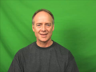

desp: happy

processing 2/56: flv_frames/frame_000001.png


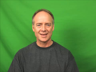

desp: happy

processing 3/56: flv_frames/frame_000002.png


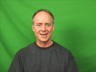

desp: happy

processing 4/56: flv_frames/frame_000003.png


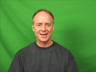

desp: happy

processing 5/56: flv_frames/frame_000004.png


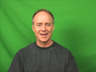

desp: happy

processing 6/56: flv_frames/frame_000005.png


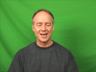

desp: happy

processing 7/56: flv_frames/frame_000006.png


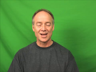

desp: happy

processing 8/56: flv_frames/frame_000007.png


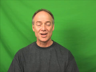

desp: anger

processing 9/56: flv_frames/frame_000008.png


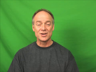

desp: anger

processing 10/56: flv_frames/frame_000009.png


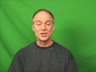

desp: anger

processing 11/56: flv_frames/frame_000010.png


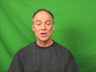

desp: anger

processing 12/56: flv_frames/frame_000011.png


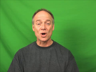

desp: anger

processing 13/56: flv_frames/frame_000012.png


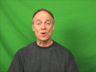

desp: anger

processing 14/56: flv_frames/frame_000013.png


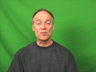

desp: calmness

processing 15/56: flv_frames/frame_000014.png


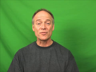

desp: calmness

processing 16/56: flv_frames/frame_000015.png


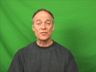

desp: calmness

processing 17/56: flv_frames/frame_000016.png


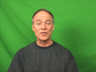

desp: calmness

processing 18/56: flv_frames/frame_000017.png


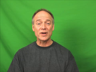

desp: anger

processing 19/56: flv_frames/frame_000018.png


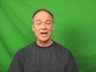

desp: anger

processing 20/56: flv_frames/frame_000019.png


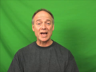

desp: anger

processing 21/56: flv_frames/frame_000020.png


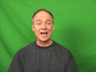

desp: anger

processing 22/56: flv_frames/frame_000021.png


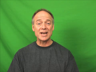

desp: anger

processing 23/56: flv_frames/frame_000022.png


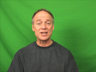

desp: calmness

processing 24/56: flv_frames/frame_000023.png


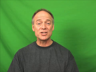

desp: anger

processing 25/56: flv_frames/frame_000024.png


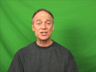

desp: anger

processing 26/56: flv_frames/frame_000025.png


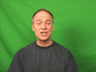

desp: anger

processing 27/56: flv_frames/frame_000026.png


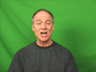

desp: anger

processing 28/56: flv_frames/frame_000027.png


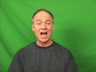

desp: anger

processing 29/56: flv_frames/frame_000028.png


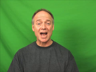

desp: anger

processing 30/56: flv_frames/frame_000029.png


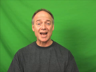

desp: anger

processing 31/56: flv_frames/frame_000030.png


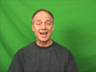

desp: happy

processing 32/56: flv_frames/frame_000031.png


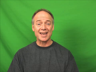

desp: happy

processing 33/56: flv_frames/frame_000032.png


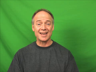

desp: happy

processing 34/56: flv_frames/frame_000033.png


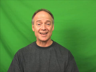

desp: happy

processing 35/56: flv_frames/frame_000034.png


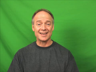

desp: happy

processing 36/56: flv_frames/frame_000035.png


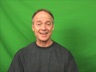

desp: happy

processing 37/56: flv_frames/frame_000036.png


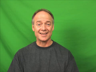

desp: happy

processing 38/56: flv_frames/frame_000037.png


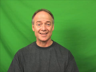

desp: happy

processing 39/56: flv_frames/frame_000038.png


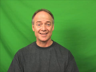

desp: happy

processing 40/56: flv_frames/frame_000039.png


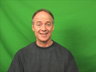

desp: happy

processing 41/56: flv_frames/frame_000040.png


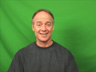

desp: happy

processing 42/56: flv_frames/frame_000041.png


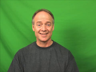

desp: happy

processing 43/56: flv_frames/frame_000042.png


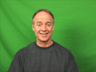

desp: happy

processing 44/56: flv_frames/frame_000043.png


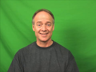

desp: happy

processing 45/56: flv_frames/frame_000044.png


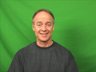

desp: happy

processing 46/56: flv_frames/frame_000045.png


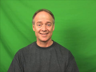

desp: happy

processing 47/56: flv_frames/frame_000046.png


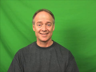

desp: happy

processing 48/56: flv_frames/frame_000047.png


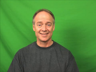

desp: happy

processing 49/56: flv_frames/frame_000048.png


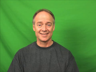

desp: happy

processing 50/56: flv_frames/frame_000049.png


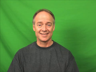

desp: happy

processing 51/56: flv_frames/frame_000050.png


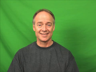

desp: happy

processing 52/56: flv_frames/frame_000051.png


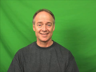

desp: happy

processing 53/56: flv_frames/frame_000052.png


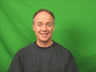

desp: happy

processing 54/56: flv_frames/frame_000053.png


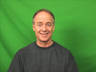

desp: happy

processing 55/56: flv_frames/frame_000054.png


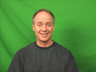

desp: happy

processing 56/56: flv_frames/frame_000055.png


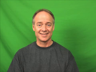

desp: happy


In [7]:
from models.blip_vqa import blip_vqa
import cv2
import os

video_path = '1001_DFA_HAP_XX.flv'
output_folder = 'flv_frames'
frame_interval = 1
target_size = None

if not os.path.exists(video_path):
    print(f"❌")
    exit()
os.makedirs(output_folder, exist_ok=True)
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("❌")
    exit()
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps if fps > 0 else 0
frame_count = 0
saved_count = 0
output_paths= []
while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval != 0:
        frame_count += 1
        continue
    if target_size:
        frame = cv2.resize(frame, target_size)

    filename = f"frame_{saved_count:06d}.png"
    output_path = os.path.join(output_folder, filename)
    output_paths.append(output_path)
    success = cv2.imwrite(output_path, frame)
    if success:
        saved_count += 1
    else:
        print(f"❌  {output_path}")

    if saved_count % 100 == 0:
        print(f"    {saved_count} ...")

    frame_count += 1

cap.release()

def load_demo_image(path,image_size,device):

    raw_image = Image.open(path).convert('RGB')

    w,h = raw_image.size
    display(raw_image.resize((w//5,h//5)))

    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])
    image = transform(raw_image).unsqueeze(0).to(device)
    return image

import torch
from models.blip import blip_decoder
from PIL import Image



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
image_size = 480

model = blip_vqa(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)
question = "Describe the emotional state and facial expression of the person in this image. Focus specifically on their apparent mood, emotional cues, and any visible expressions that indicate how they might be feeling. Consider factors like facial expression, body language, and context to determine if they appear happy, sad, angry, surprised, fearful, disgusted, neutral, or any other emotional state."
results= []
import json
with torch.no_grad():
    for i, path in enumerate(output_paths):
        print(f"\nprocessing {i+1}/{len(output_paths)}: {path}")
        image = load_demo_image(path, image_size=image_size, device=device)
        answer = model(image, question, train=False, inference='generate')
        caption_text = answer[0] if isinstance(answer, list) else answer
        results.append({
            "path": path,
            "caption": caption_text
        })
        print(f"desp: {caption_text}")


output_file = "image_captions.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(results, f, indent=4, ensure_ascii=False)



# Feature Extraction

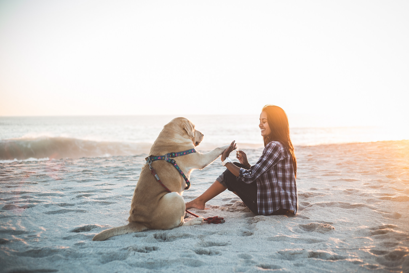

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth


In [ ]:
from models.blip import blip_feature_extractor

image_size = 224
image = load_demo_image(image_size=image_size, device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base.pth'

model = blip_feature_extractor(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device)

caption = 'a woman sitting on the beach with a dog'

multimodal_feature = model(image, caption, mode='multimodal')[0,0]
image_feature = model(image, caption, mode='image')[0,0]
text_feature = model(image, caption, mode='text')[0,0]

# Image-Text Matching

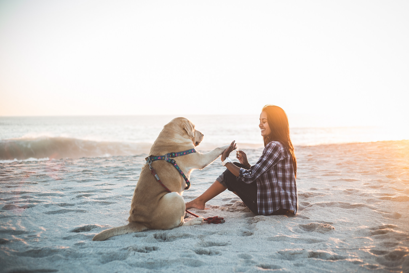

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_retrieval_coco.pth
text: a woman sitting on the beach with a dog
The image and text is matched with a probability of 0.9960
The image feature and text feature has a cosine similarity of 0.5262


In [ ]:
from models.blip_itm import blip_itm

image_size = 384
image = load_demo_image(image_size=image_size,device=device)

model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_retrieval_coco.pth'

model = blip_itm(pretrained=model_url, image_size=image_size, vit='base')
model.eval()
model = model.to(device='cpu')

caption = 'a woman sitting on the beach with a dog'

print('text: %s' %caption)

itm_output = model(image,caption,match_head='itm')
itm_score = torch.nn.functional.softmax(itm_output,dim=1)[:,1]
print('The image and text is matched with a probability of %.4f'%itm_score)

itc_score = model(image,caption,match_head='itc')
print('The image feature and text feature has a cosine similarity of %.4f'%itc_score)